In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#Read data
import pandas as pd
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [11]:
data.shape

(200, 5)

In [12]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [14]:
#Null Percentage:Rows
(data.isnull().sum(axis=1)*100/len(data)).value_counts(ascending=False)

0.0    200
dtype: int64

In [15]:
#Null Count:Rows
data.isnull().sum(axis=1).value_counts(ascending=False)

0    200
dtype: int64

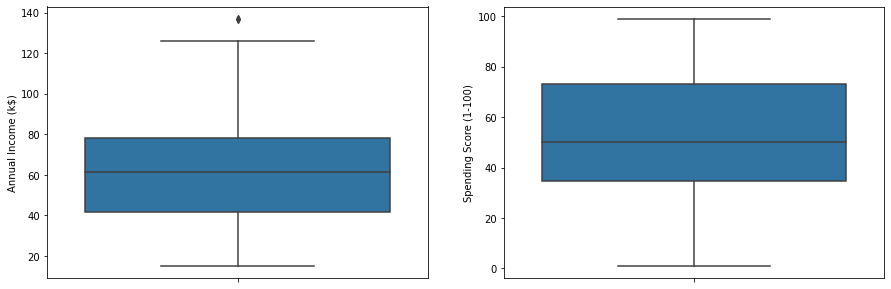

In [16]:
# Checking Outliers
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=data,y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=data,y="Spending Score (1-100)")

plt.show()



# conclusion- Data dosen't contain any outliers

C:\Users\Aishwarya\.conda\coding\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


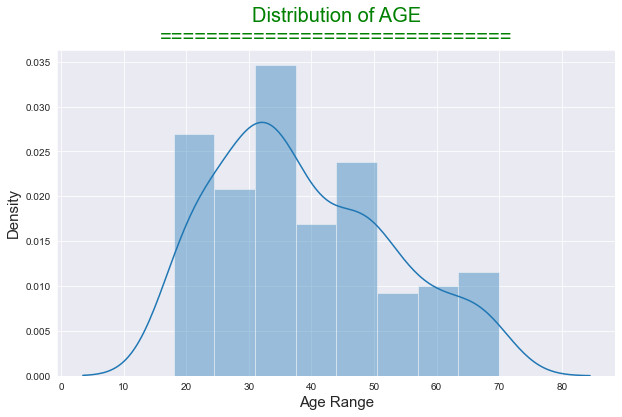

In [17]:
# Exploratory Data Analysis
#Univariate Analysis - Numerical Data Type

#Checking Age Distribution


plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(data.Age)
plt.title("Distribution of AGE\n==============================",fontsize=20,color="green")
plt.xlabel("Age Range",fontsize=15)
plt.ylabel("Density",fontsize=15)


plt.show()

# Conclusion - There are customers of wide variety of ages 

<Figure size 720x432 with 0 Axes>

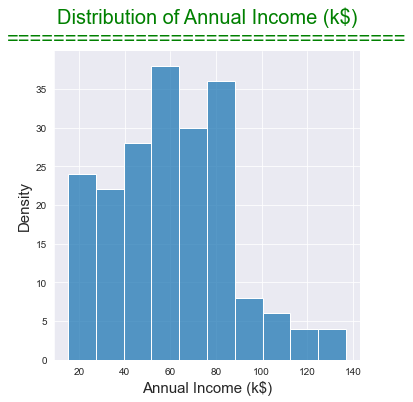

In [18]:
#Annual Income (k$) Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.displot(data["Annual Income (k$)"])
plt.title("Distribution of Annual Income (k$)\n==================================",fontsize=20,color="green")
plt.xlabel("Annual Income (k$)",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()


# Conclusion - Most of the annual income falls between 50K to 85K

C:\Users\Aishwarya\.conda\coding\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


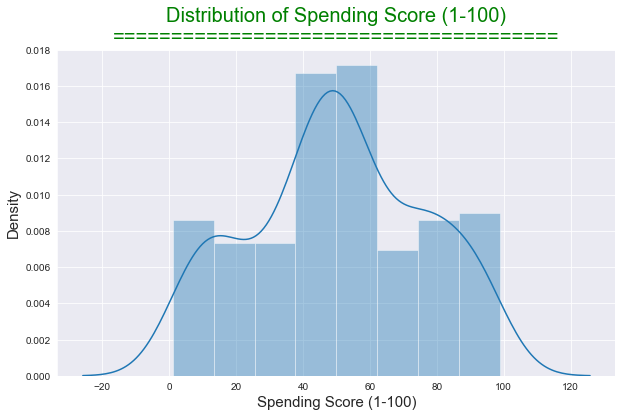

In [19]:
#Spending Score (1-100) Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(data["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)\n======================================",fontsize=20,color="green")
plt.xlabel("Spending Score (1-100)",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

# Conclusion - Most of the customers got the score ranging between 40 to 60

# # 3.2 Univariate Analysis - Ctegorical Data Type

C:\Users\Aishwarya\.conda\coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


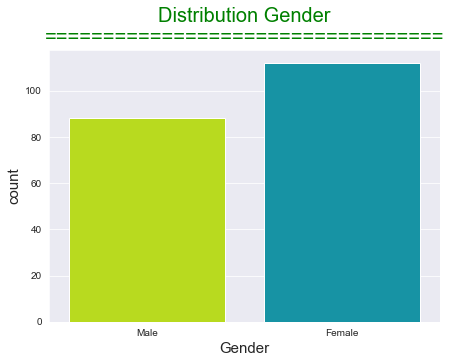

In [20]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')

plt.title("Distribution Gender\n==================================",fontsize=20,color="green")
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.countplot(data.Gender,palette="nipy_spectral_r")
plt.show()

# Conclusion - Female customers are more as compared to the male customers

##  3.3 Bivariate Analysis - Numerical-Numerical Data Type

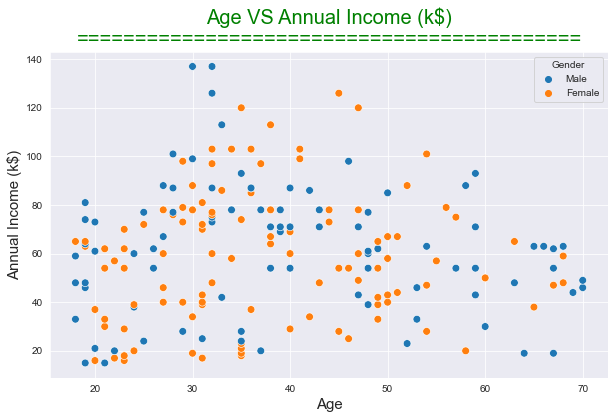

In [21]:
#Age VS Annual Income

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=data,x="Age",y="Annual Income (k$)",hue="Gender",s=60)
plt.title("Age VS Annual Income (k$)\n===========================================",fontsize=20,color="green")  
plt.xlabel("Age",fontsize=15)
plt.ylabel("Annual Income (k$)",fontsize=15)
plt.show()

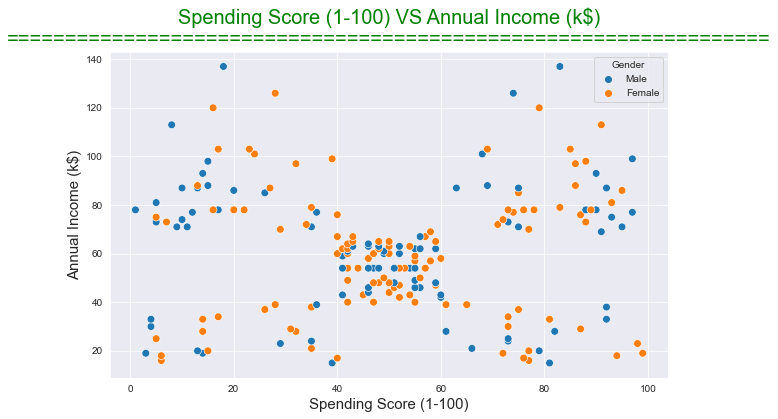

In [30]:
#spending Score VS Annual Income


plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=data, x="Spending Score (1-100)", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Spending Score (1-100) VS Annual Income (k$)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

# Binning - Age,Income and Spending Score

## Age 

In [22]:
#Age -

Age_18_25 = data.Age[(data.Age>=18) & (data.Age<=25)]
Age_26_35 = data.Age[(data.Age>=26) & (data.Age<=35)]
Age_36_45 = data.Age[(data.Age>=36) & (data.Age<=45)]
Age_46_55 = data.Age[(data.Age>=46) & (data.Age<=55)]
Age_55_Above = data.Age[(data.Age>=56)]

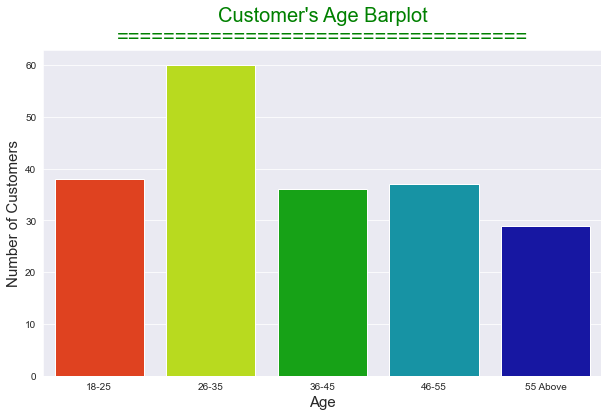

In [23]:
x = ["18-25","26-35","36-45","46-55","55 Above"]
y = [len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_55_Above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Customer's Age Barplot\n===================================",fontsize=20,color="green")
plt.xlabel("Age",fontsize=15)
plt.ylabel("Number of Customers",fontsize=15)
plt.show()

# Spending Score(1-100)

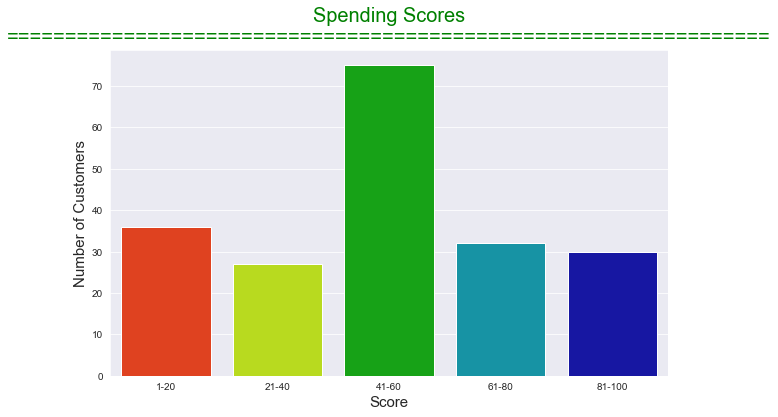

In [24]:
#Spending Score -

ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="nipy_spectral_r")
plt.title("Spending Scores\n=================================================================", fontsize=20, color="green")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

# Annual Income (k$)

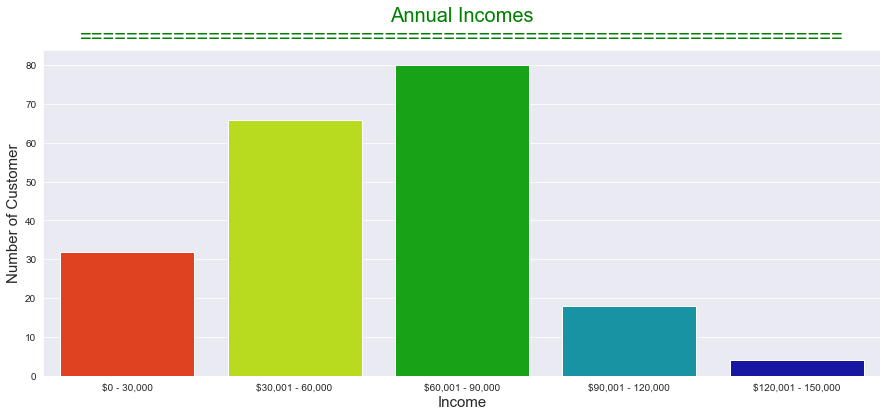

In [25]:
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

income_x = ["$0 - 30,000", "$30,001 - 60,000", "$60,001 - 90,000", "$90,001 - 120,000", "$120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes\n=================================================================", fontsize=20, color="green")
plt.xlabel("Income", fontsize=15)
plt.ylabel("Number of Customer", fontsize=15)
plt.show()

# Rescaling

In [26]:
data_scaled = data[["Age","Annual Income (k$)","Spending Score (1-100)"]]

#Class instance
scaler = StandardScaler()


# Fit_transform
data_scaled_fit = scaler.fit_transform(data_scaled)             


In [27]:
data_scaled_fit = pd.DataFrame(data_scaled_fit)
data_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
data_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [33]:
var_list = data_scaled_fit[["Annual Income (k$)","Spending Score (1-100)"]]

# Model Building

In [35]:
#k-means with some arbitrary k
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4)

In [36]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(var_list)

C:\Users\Aishwarya\.conda\coding\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [37]:
kmeans.labels_

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [39]:
#Calculating sum of squared distance

ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(var_list)
    
    ssd.append(kmeans.inertia_)

C:\Users\Aishwarya\.conda\coding\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aishwarya\.conda\coding\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aishwarya\.conda\coding\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aishwarya\.conda\coding\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known

# Finding the Optimal Number of Clusters

## The elbow curve

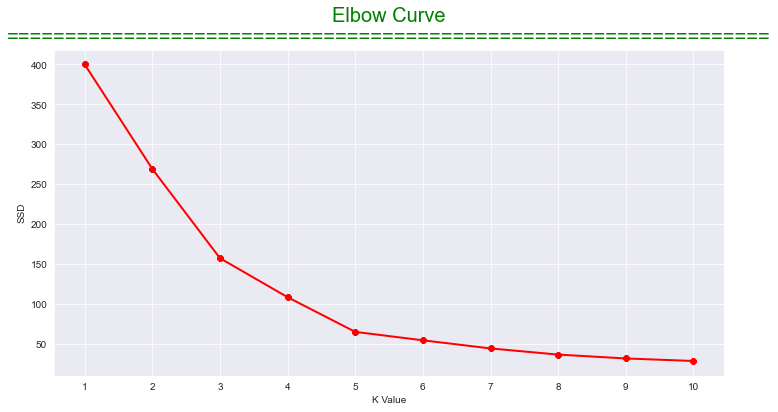

In [40]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

## Conclusion - From the above Elbow curve we will take the value of K=5 rebuild the cluster.

In [41]:
#k=5

kmeans = KMeans(n_clusters=5,max_iter=50)
kmeans.fit(var_list)

C:\Users\Aishwarya\.conda\coding\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

In [42]:
kmeans.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [43]:
data["Label"]=kmeans.labels_

In [45]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


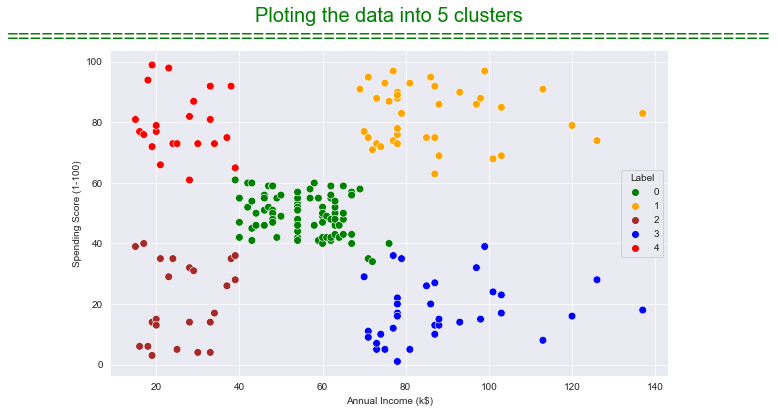

In [47]:
#ScatterPlot when k=5

plt.figure(figsize=(10,6))

plt.title("Ploting the data into 5 clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

# Conclusion - From the above we can see that the data has been clustered into 5 different parts. 

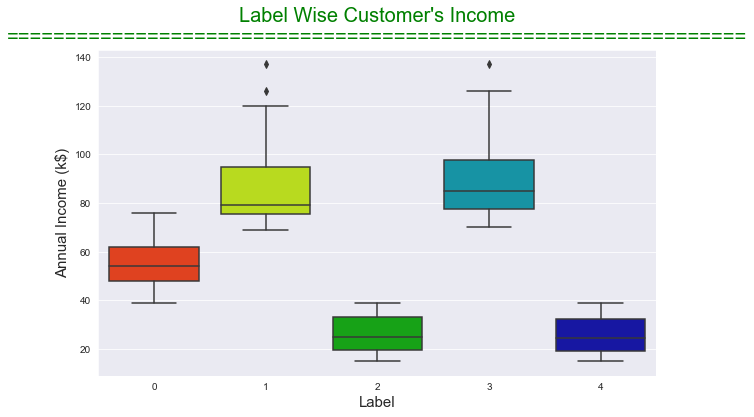

In [48]:
#plot

plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Annual Income (k$)', data=data, palette="nipy_spectral_r")
plt.title("Label Wise Customer's Income\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Annual Income (k$)",fontsize=15)
plt.show()

# Conclusion - Customer segment 1 and 4 are having high Annual income.

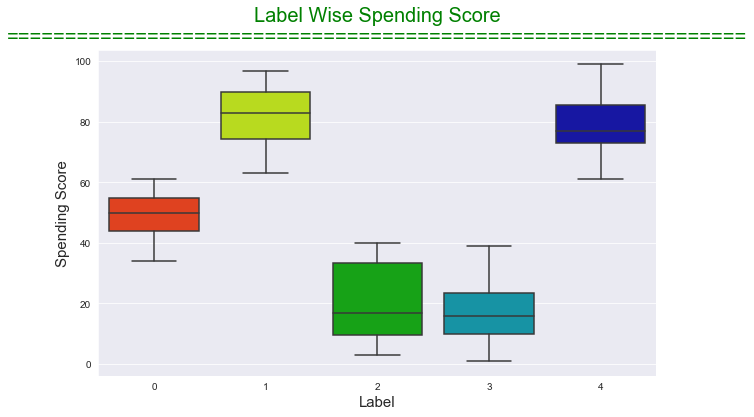

In [49]:
#plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Spending Score (1-100)', data=data, palette="nipy_spectral_r")
plt.title("Label Wise Spending Score\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Spending Score",fontsize=15)
plt.show()

In [51]:
#Getting the CustomerId for each group

cust1 = data[data.Label==0]
print("The number of customers in 1st group = ", len(cust1))
print("The Customer Id are - ", cust1.CustomerID.values)
print("============================================================================================\n")

cust2 = data[data.Label==1]
print("The number of customers in 2nd group = ", len(cust2))
print("The Customer Id are - ", cust2.CustomerID.values)
print("============================================================================================\n")

cust3 = data[data.Label==2]
print("The number of customers in 3rd group = ", len(cust3))
print("The Customer Id are - ", cust3.CustomerID.values)
print("============================================================================================\n")

cust4 = data[data.Label==3]
print("The number of customers in 4th group = ", len(cust4))
print("The Customer Id are - ", cust4.CustomerID.values)
print("============================================================================================\n")

cust5 = data[data.Label==4]
print("The number of customers in 5th group = ", len(cust5))
print("The Customer Id are - ", cust5.CustomerID.values)
print("============================================================================================\n")

The number of customers in 1st group =  81
The Customer Id are -  [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]

The number of customers in 2nd group =  39
The Customer Id are -  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

The number of customers in 3rd group =  23
The Customer Id are -  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

The number of customers in 4th group =  35
The Customer Id are -  [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

The number of customers in 5

In [52]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


# Clustering on the basis of 3 features.

In [54]:
var_list_1=data_scaled_fit[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [55]:
var_list_1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [56]:
#Model Fitting

kmeans1 = KMeans(n_clusters=5, max_iter=50)
kmeans1.fit(var_list_1)

C:\Users\Aishwarya\.conda\coding\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

In [57]:
kmeans1.labels_

array([3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3,
       2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 4, 3, 3, 3, 1, 1, 1, 1, 3, 4, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [58]:
data["Label"] = kmeans1.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


In [59]:
#Calculating sum of squared distance

ssd = []

for num_clusters in range(1,11):
    kmeans1 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans1.fit(var_list_1)
    
    ssd.append(kmeans1.inertia_)


C:\Users\Aishwarya\.conda\coding\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aishwarya\.conda\coding\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aishwarya\.conda\coding\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aishwarya\.conda\coding\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known

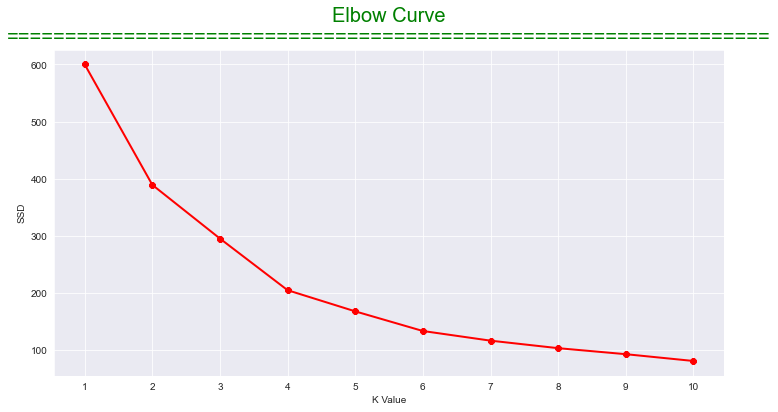

In [61]:
#Elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

In [62]:
from mpl_toolkits.mplot3d import Axes3D

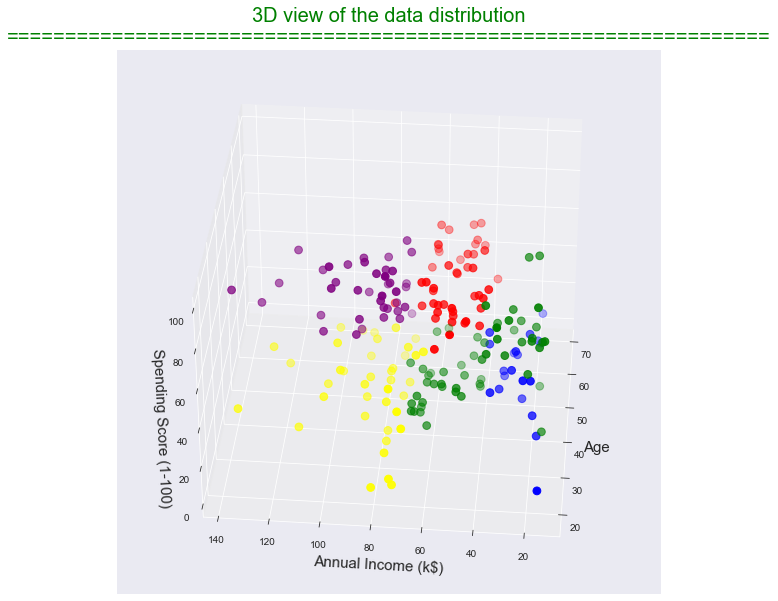

In [64]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.Label == 0], data["Annual Income (k$)"][data.Label == 0], data["Spending Score (1-100)"][data.Label == 0], c='purple', s=60)
ax.scatter(data.Age[data.Label == 1], data["Annual Income (k$)"][data.Label == 1], data["Spending Score (1-100)"][data.Label == 1], c='red', s=60)
ax.scatter(data.Age[data.Label == 2], data["Annual Income (k$)"][data.Label == 2], data["Spending Score (1-100)"][data.Label == 2], c='blue', s=60)
ax.scatter(data.Age[data.Label == 3], data["Annual Income (k$)"][data.Label == 3], data["Spending Score (1-100)"][data.Label == 3], c='green', s=60)
ax.scatter(data.Age[data.Label == 4], data["Annual Income (k$)"][data.Label == 4], data["Spending Score (1-100)"][data.Label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.title("3D view of the data distribution\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
ax.set_zlabel('Spending Score (1-100)', fontsize=15)
plt.show()

In [ ]:
#printing the customerID according to the groups

cust1 = data[data.Label==0]
print("The number of customers in 1st group = ", len(cust1))
print("The Customer Id are - ", cust1.CustomerID.values)
print("============================================================================================\n")

cust2 = data[data.Label==1]
print("The number of customers in 2nd group = ", len(cust2))
print("The Customer Id are - ", cust2.CustomerID.values)
print("============================================================================================\n")

cust3 = data[data.Label==2]
print("The number of customers in 3rd group = ", len(cust3))
print("The Customer Id are - ", cust3.CustomerID.values)
print("============================================================================================\n")

cust4 = data[data.Label==3]
print("The number of customers in 4th group = ", len(cust4))
print("The Customer Id are - ", cust4.CustomerID.values)
print("============================================================================================\n")

cust5 = data[data.Label==4]
print("The number of customers in 5th group = ", len(cust5))
print("The Customer Id are - ", cust5.CustomerID.values)
print("============================================================================================\n")

<AxesSubplot:ylabel='Gender'>

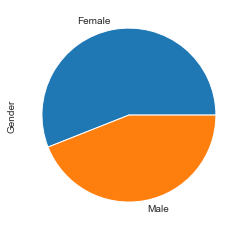

In [44]:
#category
data['Gender'].value_counts(normalize=True).plot.pie()

In [ ]:
data['Gender'].value_counts(normalize=True)*100

In [ ]:
data['Gender'].value_counts().plot.area()

In [ ]:
#graphical comparison between Age and Annual Income (k$)
import matplotlib.pyplot as plt
plt.scatter(data['Annual Income (k$)'],data['Age'])
plt.show()

In [ ]:
data.dtypes

In [ ]:
plt.scatter(data['Spending Score (1-100)'],data['Age'])
plt.show()